### Tendai Munyanyi & On my honor, as a student, l have neither given nor received unauthorized aid on this academic work

Inspried by - 

- [An Introduction to Principal Component Analysis (PCA) with 2018 World Soccer Players Data](https://blog.exploratory.io/an-introduction-to-principal-component-analysis-pca-with-2018-world-soccer-players-data-810d84a14eab): The primary source of this lab.

- [Using PCA to See Which Countries have Better Players for World Cup Games](https://blog.exploratory.io/using-pca-to-see-which-countries-have-better-players-for-world-cup-games-a72f91698b95)

Helpful resources:

- [PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e)
- [Principal Component Analysis Visualization by Prasad Ostwal](https://ostwalprasad.github.io/machine-learning/PCA-using-python.html)
- [PCA in 3 steps by Sebastian Raschka](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html)
- [PCA by plotly](https://plot.ly/ipython-notebooks/principal-component-analysis/)
- [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-
- [Principal Component Analysis (PCA) from Scratch](https://drscotthawley.github.io/blog/2019/12/21/PCA-From-Scratch.html)
- [Understanding the Covariance Matrix](https://datascienceplus.com/understanding-the-covariance-matrix/)

# Principal Component Analysis (PCA)

## Data wranling & EDA

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px  #if you don't have this, install "pip install plotly"

# regression
import sklearn.linear_model as lm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score

# validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# regression feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

# pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

### Data: FIFA 18 Complete Player Dataset:

FIFA 18 Complete Player Dataset: 17k+ players, 70+ attributes extracted from the latest edition of FIFA [Source: Kaggle](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/kernels)

Complete Dataset including :

- Player personal data like Nationality, Photo, Club, Age, Wage, Salary etc.
- **Player skill measures** such as Dribbling, Aggression, GK Skills etc.
- Playing position related data.

There are **34 measures about the players’ skills**. [Source](https://blog.exploratory.io/an-introduction-to-principal-component-analysis-pca-with-2018-world-soccer-players-data-810d84a14eab)

In [3]:
# import CompleteDataset.csv
df = pd.read_csv("data/CompleteDataset.csv")
df.head()

,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# how many rows
len(df)

17981

In [5]:
# print column names
df.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

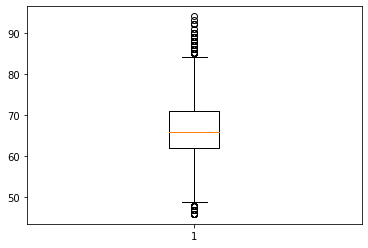

In [6]:
# overall player score using boxplot
plt.boxplot(df['Overall']);

In [7]:
# get the columns associated with skills
skills = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys']

# print how many skills in the dataset
len(skills)   # 34 skills

34

In [8]:
# add the overall column to the skills column ... we will use the overall column as y value in regression
select_cols=skills+['Overall']
# how many columns ... should print 35
len(select_cols)

35

In [9]:
# select 34 skills and the overall column ... total 35 columns for further analysis
df=df[select_cols]
#head()
df.head()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Overall
0,89,63,89,63,93,95,85,81,91,94,...,83,94,23,91,92,31,80,85,88,94
1,92,48,90,95,95,96,77,89,97,95,...,88,85,26,87,73,28,59,90,85,93
2,94,56,96,82,95,92,75,81,96,89,...,81,80,33,90,78,24,53,80,83,92
3,88,78,86,60,91,83,77,86,86,94,...,83,87,38,77,89,45,80,84,88,92
4,58,29,52,35,48,70,15,14,30,13,...,55,25,11,61,44,10,83,70,11,92


In [10]:
# print data types
df.dtypes

Acceleration          object
Aggression            object
Agility               object
Balance               object
Ball control          object
Composure             object
Crossing              object
Curve                 object
Dribbling             object
Finishing             object
Free kick accuracy    object
GK diving             object
GK handling           object
GK kicking            object
GK positioning        object
GK reflexes           object
Heading accuracy      object
Interceptions         object
Jumping               object
Long passing          object
Long shots            object
Marking               object
Penalties             object
Positioning           object
Reactions             object
Short passing         object
Shot power            object
Sliding tackle        object
Sprint speed          object
Stamina               object
Standing tackle       object
Strength              object
Vision                object
Volleys               object
Overall       

In [11]:
# convert 34 skill columns to numeric
df[skills]=df[skills].apply(pd.to_numeric, errors='coerce')
df.dtypes

Acceleration          float64
Aggression            float64
Agility               float64
Balance               float64
Ball control          float64
Composure             float64
Crossing              float64
Curve                 float64
Dribbling             float64
Finishing             float64
Free kick accuracy    float64
GK diving             float64
GK handling           float64
GK kicking            float64
GK positioning        float64
GK reflexes           float64
Heading accuracy      float64
Interceptions         float64
Jumping               float64
Long passing          float64
Long shots            float64
Marking               float64
Penalties             float64
Positioning           float64
Reactions             float64
Short passing         float64
Shot power            float64
Sliding tackle        float64
Sprint speed          float64
Stamina               float64
Standing tackle       float64
Strength              float64
Vision                float64
Volleys   

In [12]:
# check missing values
df.isnull().sum()

Acceleration           84
Aggression             68
Agility                71
Balance                57
Ball control          141
Composure              94
Crossing               96
Curve                  73
Dribbling             131
Finishing             114
Free kick accuracy     49
GK diving              26
GK handling            27
GK kicking             19
GK positioning         26
GK reflexes            29
Heading accuracy       75
Interceptions         100
Jumping                70
Long passing          121
Long shots             83
Marking               112
Penalties              30
Positioning            95
Reactions             115
Short passing         149
Shot power             73
Sliding tackle         95
Sprint speed          114
Stamina               108
Standing tackle       124
Strength              104
Vision                107
Volleys                41
Overall                 0
dtype: int64

In [13]:
# drop rows with missing values
df=df.dropna()
# print how many rows
len(df)

17322

### Correlation analysis

In [14]:
# a quick correlation analysis
df.corr()

,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,...,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Overall
Acceleration,1.000000,0.250460,0.799503,0.702167,0.671326,0.437323,0.659114,0.600776,0.742962,0.597838,...,0.562667,0.536467,0.156981,0.915416,0.606243,0.155888,-0.163810,0.455135,0.568513,0.202172
Aggression,0.250460,1.000000,0.234988,0.183134,0.538733,0.583762,0.467977,0.393220,0.422976,0.232660,...,0.596036,0.496148,0.710887,0.283043,0.643858,0.734093,0.465147,0.296379,0.320025,0.398569
Agility,0.799503,0.234988,1.000000,0.766149,0.701429,0.492738,0.690225,0.675094,0.759311,0.634394,...,0.611239,0.565176,0.108130,0.753741,0.561073,0.113031,-0.243959,0.588900,0.622282,0.262854
Balance,0.702167,0.183134,0.766149,1.000000,0.597229,0.372178,0.614839,0.578329,0.661470,0.514050,...,0.536240,0.452281,0.152762,0.637097,0.469914,0.145835,-0.404416,0.484030,0.511217,0.094555
Ball control,0.671326,0.538733,0.701429,0.597229,1.000000,0.763114,0.840595,0.832912,0.932558,0.785679,...,0.905473,0.828335,0.367423,0.664462,0.721092,0.395990,0.074166,0.721418,0.793570,0.450346
Composure,0.437323,0.583762,0.492738,0.372178,0.763114,1.000000,0.648091,0.668491,0.679111,0.587684,...,0.758010,0.698573,0.388201,0.445120,0.605305,0.421180,0.268225,0.633853,0.644712,0.629569
Crossing,0.659114,0.467977,0.690225,0.614839,0.840595,0.648091,1.000000,0.830948,0.853204,0.651190,...,0.811947,0.705772,0.405141,0.642883,0.663735,0.416367,-0.039707,0.682868,0.689207,0.391097
Curve,0.600776,0.393220,0.675094,0.578329,0.832912,0.668491,0.830948,1.000000,0.841642,0.754215,...,0.779259,0.784898,0.227094,0.578838,0.589902,0.251425,-0.039401,0.742896,0.800844,0.412139
Dribbling,0.742962,0.422976,0.759311,0.661470,0.932558,0.679111,0.853204,0.841642,1.000000,0.821428,...,0.836956,0.796358,0.253671,0.725058,0.674832,0.275362,-0.053563,0.728463,0.809341,0.354662
Finishing,0.597838,0.232660,0.634394,0.514050,0.785679,0.587684,0.651190,0.754215,0.821428,1.000000,...,0.660131,0.798241,-0.083459,0.587262,0.499896,-0.048279,-0.021394,0.689419,0.879368,0.319522


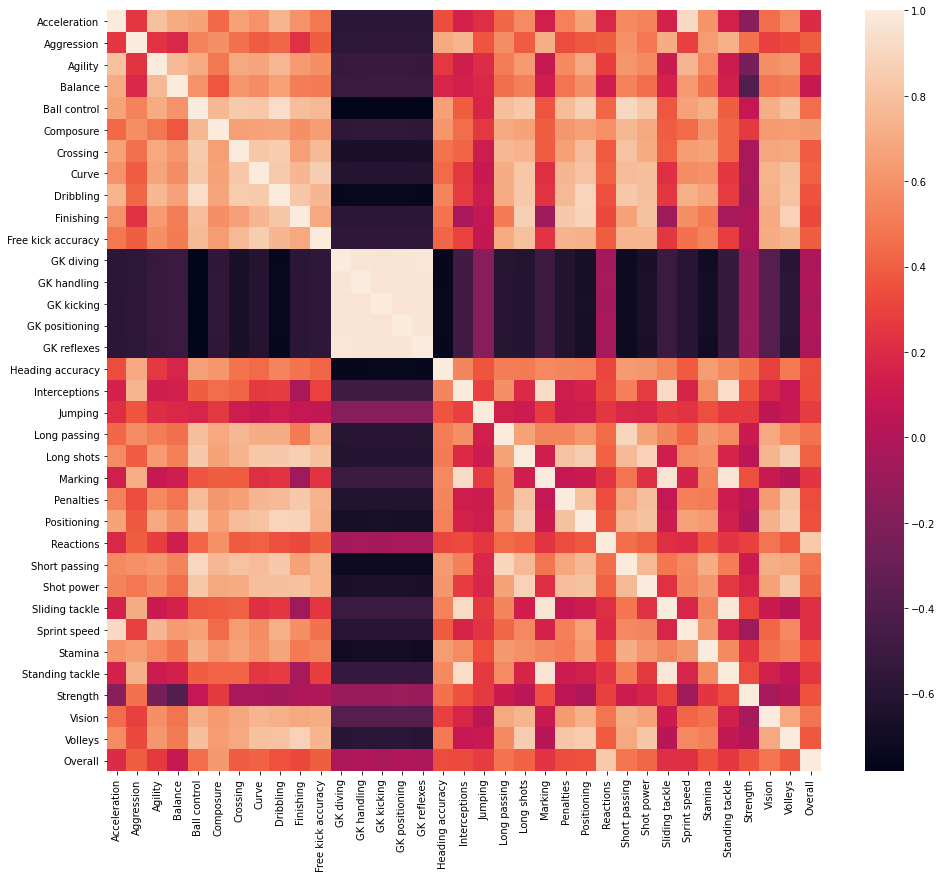

In [15]:
# heatmap for correlation analysis
plt.figure(figsize=(16,14))
sns.heatmap(df.corr());

## PCA

In [16]:
# let's define X and y
  # data converted into list format
X = df.drop('Overall', axis=1).values  
y = df['Overall'].values

In [17]:
# Standardizing or normalizing the features 
x = StandardScaler().fit_transform(X)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.642399,0.415275,1.739185,-0.053936,2.079105,2.871938,1.912267,1.832748,1.895991,2.507136,...,3.719668,1.658040,2.210802,-1.049699,1.794552,1.808773,-0.751302,1.167686,2.229189,2.532854
1,1.843309,-0.442361,1.806715,2.211341,2.197923,2.949175,1.478905,2.266520,2.211468,2.558486,...,3.610748,1.992592,1.693102,-0.910099,1.521388,0.618288,-0.888650,-0.494103,2.576732,2.363518
2,1.977249,0.015045,2.211889,1.291072,2.197923,2.640229,1.370565,1.832748,2.158888,2.250387,...,2.848310,1.524218,1.405491,-0.584366,1.726261,0.931573,-1.071779,-0.968899,1.881646,2.250628
3,1.575429,1.272911,1.536598,-0.266306,1.960287,1.945099,1.478905,2.103856,1.633093,2.507136,...,3.392909,1.658040,1.808147,-0.351699,0.838478,1.620802,-0.110349,1.167686,2.159680,2.532854
4,-0.433674,-1.528700,-0.759393,-2.036054,-0.594299,0.941023,-1.879650,-1.800094,-1.311358,-1.652201,...,2.521551,-0.215457,-1.758229,-1.608098,-0.254177,-1.198769,-1.712733,1.405085,1.186561,-1.813424


In [18]:
# run PCA with 15 components
pca = PCA(n_components=15)
components = pca.fit_transform(x)
components.shape

(17322, 15)

In [19]:
# print cumulative sum of explained variance
print(pca.explained_variance_ratio_.cumsum())

[0.55367563 0.70199056 0.77127065 0.82120342 0.86042258 0.87877937
 0.89137936 0.90230783 0.91138899 0.91955452 0.92701237 0.93392786
 0.94059458 0.94696121 0.95299306]


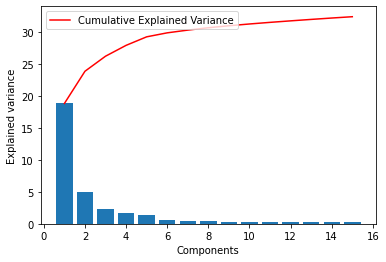

In [20]:
# visualize Cumulative Explained Variance
plt.bar(range(1,len(pca.explained_variance_ )+1),pca.explained_variance_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ )+1),
         np.cumsum(pca.explained_variance_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left');

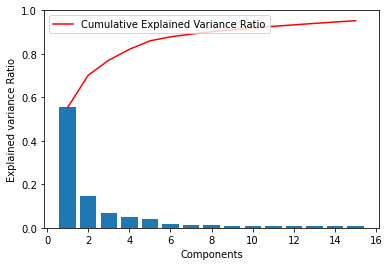

In [21]:
# visualize Cumulative Explained Variance Ratio
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance Ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance Ratio")
plt.legend(loc='upper left')

2 compoenents look good.

In [22]:
# run 2 components PCA
pca = PCA(n_components=2)
components = pca.fit_transform(x)
components.shape

(17322, 2)

### Effect of variables on each components

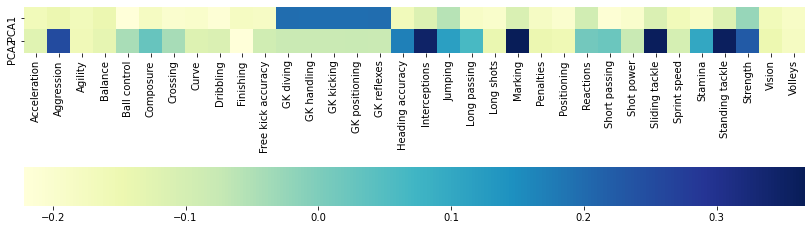

In [23]:
# visualize the effect of variables on each components
plt.figure(figsize=(14,14))

X_features = df.drop('Overall', axis=1)

ax = sns.heatmap(pca.components_,
                 cmap='YlGnBu',
                 yticklabels=[ "PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(X_features.columns),
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")

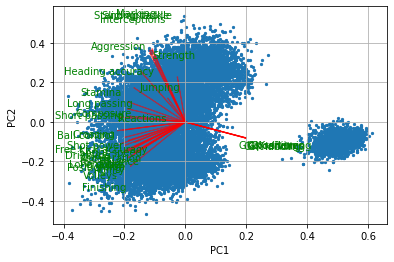

In [24]:
X_features = df.drop('Overall', axis=1)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.5, coeff[i,1] * 1.5, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.5, coeff[i,1] * 1.5, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(components[:,0:2],np.transpose(pca.components_[0:2, :]),list(X_features.columns))
plt.show()

## Regression: using PCA components as the inputs for machine learning

### Why use PCA with machine learning? What benefits?

- The primary goal of PCA (and other dimentionality reduction) is to reduce the number of variables (or the dimension of your data) to a more manageable set of variables.
- A large dataset with so many columns (**high-dimensional data**) introduces such challenges as **overfitting models** (due to model complexity) and **slow model building**. 
- Reducing the features enables **faster ML model building** and **avoiding overfitting**. PCA and similar techniques are necessary for high-dimensional data.

### Regression analysis without PCA

Build the full regression model with **split validation**.

Report the model accuracy (mean squared error).

In [25]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# initialize lineargression and fit the training data
lr = lm.LinearRegression()
lr.fit(X_train, y_train)

# print mean square error
# print explained variance score
print(metrics.mean_squared_error(y_test, lr.predict(X_test)))
print(metrics.explained_variance_score(y_test, lr.predict(X_test)))

7.439345817535903
0.8479785201102913


### Regression analysis with PCA

Choose the minimum number of principal components such that 95% of the variance is retained.

Report the model accuracy.

In [26]:
X = df.drop('Overall', axis=1).values
y = df['Overall'].values

# Standardizing or normalizing the features 
x = StandardScaler().fit_transform(X)
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.642399,0.415275,1.739185,-0.053936,2.079105,2.871938,1.912267,1.832748,1.895991,2.507136,...,3.719668,1.658040,2.210802,-1.049699,1.794552,1.808773,-0.751302,1.167686,2.229189,2.532854
1,1.843309,-0.442361,1.806715,2.211341,2.197923,2.949175,1.478905,2.266520,2.211468,2.558486,...,3.610748,1.992592,1.693102,-0.910099,1.521388,0.618288,-0.888650,-0.494103,2.576732,2.363518
2,1.977249,0.015045,2.211889,1.291072,2.197923,2.640229,1.370565,1.832748,2.158888,2.250387,...,2.848310,1.524218,1.405491,-0.584366,1.726261,0.931573,-1.071779,-0.968899,1.881646,2.250628
3,1.575429,1.272911,1.536598,-0.266306,1.960287,1.945099,1.478905,2.103856,1.633093,2.507136,...,3.392909,1.658040,1.808147,-0.351699,0.838478,1.620802,-0.110349,1.167686,2.159680,2.532854
4,-0.433674,-1.528700,-0.759393,-2.036054,-0.594299,0.941023,-1.879650,-1.800094,-1.311358,-1.652201,...,2.521551,-0.215457,-1.758229,-1.608098,-0.254177,-1.198769,-1.712733,1.405085,1.186561,-1.813424


In [27]:
# obtain components satisfying 95% variance
pca = PCA(.95)
components = pca.fit_transform(x)
components.shape

(17322, 15)

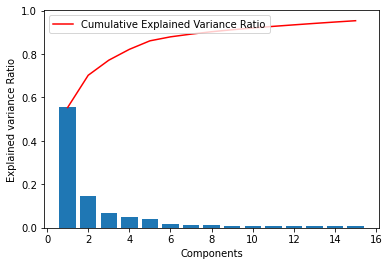

In [28]:
# visualize Cumulative Explained Variance Ratio
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance Ratio')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance Ratio")
plt.legend(loc='upper left')

In [29]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# initialize lineargression and fit the training data
lr = lm.LinearRegression()
lr.fit(X_train, y_train)
# print mean square error
# print explained variance score
print(metrics.mean_squared_error(y_test, lr.predict(X_test)))
print(metrics.explained_variance_score(y_test, lr.predict(X_test)))

7.439345817535903
0.8479785201102913


15 components can deliver a good accuracy.